<a href="https://colab.research.google.com/github/LaisST/FIAP_202501_HandsOn_data_analytics/blob/main/Tech_Challenge_Clima_x_Exportacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tech Challenge - Fase 1

Objetivo é dizer o montante de venda de exportação nos últimos 15
anos, separando a análise por país e trazendo quais as prospecções futuras e
possíveis ações para uma melhoria nas exportações.


# Impacto de Fatores Climáticos na Exportação de Vinhos Brasileiros (2010–2024)


Esta análise tem como objetivo explicar como as condições climáticas impactaram as exportações de vinho entre 2010 e 2024, relacionando os anos de maior e menor volume exportado com dados de temperatura, precipitação e eventos climáticos adversos nas regiões produtoras. Os dados utilizados foram obtidos em fontes oficiais, como o Instituto Nacional de Meteorologia (INMET).

## Passo a Passo
1. Coletar e organizar os dados de exportação de vinhos;
2. Analisar os dados (Países que mais importam vinhos do Brasil, Quantidade, Ano com maior número de exportação, etc)
3. Adicionar contexto com dados externos (Clima, demografia, Economia, etc)
4. Construir as visualizações (Power BI ou outra ferramenta que o Grupo Sugerir)
5. Conclusão (Formular um texto com a conclusão da análise, por exemplo, Países com maior oportunidade de crescimento de exportação, ações de melhoria, etc)

## Passo 1
Coletar e Organização os dados

### Importação das bibliotecas

In [1]:
# Manipulação dos dados
import pandas as pd
import numpy as np

# Visualização dos dados
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

### Tratativa da Base Exportação - Vinho de Mesa

In [2]:
#Carregamento dos dados
#Fonte: Vinícola Parceira - Aba Exportação (http://vitibrasil.cnpuv.embrapa.br/index.php?opcao=opt_06)

VinhoMesa = pd.read_csv('/content/ExpVinho(2).csv', sep='\t', encoding='utf-8')

In [3]:
# Criar o Dataframe e expor as primeiras linhas
df_VinhoMesa = pd.DataFrame(VinhoMesa)
df_VinhoMesa.head()

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2020,2020.1,2021,2021.1,2022,2022.1,2023,2023.1,2024,2024.1
0,1,Afeganistão,0,0,0,0,0,0,0,0,...,0,0,11,46,0,0,0,0,0,0
1,2,África do Sul,0,0,0,0,0,0,0,0,...,4,21,0,0,0,0,117,698,103,1783
2,3,"Alemanha, República Democrática",0,0,0,0,4168,2630,12000,8250,...,6261,32605,2698,6741,7630,45367,4806,31853,6666,48095
3,4,Angola,0,0,0,0,0,0,0,0,...,0,0,0,0,4068,4761,0,0,0,0
4,5,Anguilla,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#Identificar os índices
df_VinhoMesa

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2020,2020.1,2021,2021.1,2022,2022.1,2023,2023.1,2024,2024.1
0,1,Afeganistão,0,0,0,0,0,0,0,0,...,0,0,11,46,0,0,0,0,0,0
1,2,África do Sul,0,0,0,0,0,0,0,0,...,4,21,0,0,0,0,117,698,103,1783
2,3,"Alemanha, República Democrática",0,0,0,0,4168,2630,12000,8250,...,6261,32605,2698,6741,7630,45367,4806,31853,6666,48095
3,4,Angola,0,0,0,0,0,0,0,0,...,0,0,0,0,4068,4761,0,0,0,0
4,5,Anguilla,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,137,Tuvalu,0,0,0,0,0,0,0,0,...,2,4,0,0,0,0,0,0,0,0
137,138,Uruguai,0,0,0,0,0,0,0,0,...,0,0,136774,149842,637117,997367,326093,454271,36729,62325
138,139,Vanuatu,0,0,0,0,0,0,0,0,...,18,31,0,0,0,0,0,0,0,0
139,140,Venezuela,0,0,3200,2000,1350,750,11700,6458,...,4086,9808,26415,35944,23220,32351,141030,220512,122922,199418


In [5]:
# Exclusão dos anos que não serão analisados
df_VinhoMesa = df_VinhoMesa.drop(df_VinhoMesa.columns[2:82], axis=1)
df_VinhoMesa.head()

,Id,País,2010,2010.1,2011,2011.1,2012,2012.1,2013,2013.1,...,2020,2020.1,2021,2021.1,2022,2022.1,2023,2023.1,2024,2024.1
0,1,Afeganistão,0,0,0,0,0,0,0,0,...,0,0,11,46,0,0,0,0,0,0
1,2,África do Sul,0,0,0,0,0,0,0,0,...,4,21,0,0,0,0,117,698,103,1783
2,3,"Alemanha, República Democrática",27715,138666,36070,144150,8189,56342,61699,265978,...,6261,32605,2698,6741,7630,45367,4806,31853,6666,48095
3,4,Angola,33557,189891,13889,69001,2833,8861,1573,9300,...,0,0,0,0,4068,4761,0,0,0,0
4,5,Anguilla,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#Verificar as colunas que contém .1, pois são as colunas referente ao valor em USD
df_VinhoMesa.columns[df_VinhoMesa.columns.str.contains(r'\.1')]

Index(['2010.1', '2011.1', '2012.1', '2013.1', '2014.1', '2015.1', '2016.1',
       '2017.1', '2018.1', '2019.1', '2020.1', '2021.1', '2022.1', '2023.1',
       '2024.1'],
      dtype='object')

In [7]:
#Separando as colunas de Litros e Valor
# Colunas de quantidade: Percorrer a tabela e adicinar a lista as colunas que contém apenas digitos (sem .)
coluna_litros = [col for col in df_VinhoMesa.columns if col.isdigit()]

# Colunas de valor USD: Percorrer a tabela e adicionar a lista apenas as colunas que contém .1
coluna_Valor = [col for col in df_VinhoMesa.columns if '.1' in col]

In [8]:
#Separar a tabela(DataFrames) em valor e quantidade(litros)
# Dados de quantidade (litros)
df_litros = df_VinhoMesa[['Id', 'País'] + coluna_litros]

# Dados de valor
df_valor = df_VinhoMesa[['Id', 'País'] + coluna_Valor]

In [9]:
#Renomear a coluna ano para tirar o .1
df_valor.columns = ['Id', 'País'] + [col.replace('.1', '') for col in coluna_Valor]

In [10]:
#Usar o método melt() para transforma a coluna de ano em linhas
# Transformando quantidade
df_quantidade_linhas = df_litros.melt(id_vars=['Id', 'País'], var_name='Ano', value_name='Quantidade(L)')

# Transformando valor
df_valor_linhas = df_valor.melt(id_vars=['Id', 'País'], var_name='Ano', value_name='Valor(USD)')

In [11]:
#Juntar as duas tabelas(DataFrame) usando o merge()
exportacao_anual_Pais = pd.merge(df_quantidade_linhas, df_valor_linhas, on=['Id', 'País', 'Ano'])
exportacao_anual_Pais

,Id,País,Ano,Quantidade(L),Valor(USD)
0,1,Afeganistão,2010,0,0
1,2,África do Sul,2010,0,0
2,3,"Alemanha, República Democrática",2010,27715,138666
3,4,Angola,2010,33557,189891
4,5,Anguilla,2010,0,0
...,...,...,...,...,...
2110,137,Tuvalu,2024,0,0
2111,138,Uruguai,2024,36729,62325
2112,139,Vanuatu,2024,0,0
2113,140,Venezuela,2024,122922,199418


In [12]:
#Salvando os dados organizados em outra planilha csv
exportacao_anual_Pais.to_excel('/content/exportacao_anual_Pais.xlsx', index=False)

In [13]:
#Calcular a média de exportação por Ano
#Selecionar as colunas necessárias
colunas_necessarias_exportacao = [
    'Quantidade(L)',
    'Valor(USD)'
]

In [15]:
# Agrupar por ano e calcular a média
exportacao_anual = exportacao_anual_Pais.groupby('Ano')[colunas_necessarias_exportacao].mean().reset_index()

In [16]:
# Visualizar e salvar em excel
#Salvando os dados organizados em outra planilha csv
exportacao_anual.to_excel('/content/exportacao_anual.xlsx', index=False)
exportacao_anual

,Ano,Quantidade(L),Valor(USD)
0,2010,9082.085106,18406.404255
1,2011,8615.843972,25639.148936
2,2012,40960.113475,39158.106383
3,2013,64886.943262,161310.957447
4,2014,16482.475177,52998.546099
5,2015,8499.851064,19639.432624
6,2016,12670.560284,31451.801418
7,2017,20493.418440,50607.141844
8,2018,27348.666667,53092.645390
9,2019,22360.801418,42090.964539


### Tratativa da Base Clima RS

In [17]:
#Carregamento dos dados
#Fonte: Instituto Nacional de Meteorologia (INMET) https://bdmep.inmet.gov.br/

clima_RS = pd.read_excel('/content/Base RS.xlsx')

In [18]:
#Visualizar Dataframe original
clima_RS.head(10)

,Nome da Origem,DATA (YYYY-MM-DD),HORA (UTC),"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (KJ/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)"
0,INMET_S_RS_2018.CSV,2018-12-31,00:00:00,0.0,1002.8,1002.8,1002.1,NaN,28.9,22.0,29.7,28.8,22.0,21.2,66.0,60.0,66.0,166.0,2.3,0.0
1,INMET_S_RS_2018.CSV,2018-12-31,01:00:00,0.0,1003.9,1004.0,1002.8,NaN,28.2,22.4,28.9,28.0,22.6,21.9,72.0,66.0,71.0,154.0,2.2,0.6
2,INMET_S_RS_2018.CSV,2018-12-31,02:00:00,0.0,1004.0,1004.1,1003.9,NaN,28.1,24.6,28.5,27.9,24.6,22.3,82.0,69.0,81.0,158.0,5.1,0.9
3,INMET_S_RS_2018.CSV,2018-12-31,03:00:00,0.0,1003.8,1004.1,1003.7,NaN,27.4,24.6,28.1,27.4,25.4,24.6,87.0,81.0,85.0,2.0,4.4,0.4
4,INMET_S_RS_2018.CSV,2018-12-31,04:00:00,0.0,1003.6,1003.8,1003.6,NaN,27.0,23.9,27.5,26.9,24.6,23.8,85.0,82.0,83.0,161.0,4.1,0.9
5,INMET_S_RS_2018.CSV,2018-12-31,05:00:00,0.0,1003.8,1003.9,1003.6,NaN,25.7,23.2,27.0,25.7,24.1,22.8,86.0,81.0,86.0,164.0,6.2,1.7
6,INMET_S_RS_2018.CSV,2018-12-31,06:00:00,0.0,1004.0,1004.1,1003.7,NaN,25.0,22.9,25.7,25.0,23.3,22.9,88.0,86.0,88.0,156.0,6.7,1.5
7,INMET_S_RS_2018.CSV,2018-12-31,07:00:00,0.0,1004.3,1004.3,1003.9,NaN,24.5,22.0,25.0,24.4,22.9,22.0,88.0,86.0,86.0,112.0,6.4,1.5
8,INMET_S_RS_2018.CSV,2018-12-31,08:00:00,0.0,1004.7,1004.7,1004.2,NaN,24.2,22.3,24.5,24.2,22.4,22.0,89.0,86.0,89.0,132.0,5.6,1.3
9,INMET_S_RS_2018.CSV,2018-12-31,09:00:00,0.0,1005.7,1005.7,1004.7,28.6,24.4,22.4,24.4,24.1,22.5,22.3,90.0,89.0,89.0,145.0,4.0,1.0


In [19]:
# Criar coluna de ano com base na coluna Nome da Oriegm
clima_RS['Ano'] = clima_RS['Nome da Origem'].str.extract(r'(\d{4})').astype(int)
clima_RS

,Nome da Origem,DATA (YYYY-MM-DD),HORA (UTC),"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (KJ/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),...,TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",Ano
0,INMET_S_RS_2018.CSV,2018-12-31,00:00:00,0.0,1002.8,1002.8,1002.1,NaN,28.9,22.0,...,28.8,22.0,21.2,66.0,60.0,66.0,166.0,2.3,0.0,2018
1,INMET_S_RS_2018.CSV,2018-12-31,01:00:00,0.0,1003.9,1004.0,1002.8,NaN,28.2,22.4,...,28.0,22.6,21.9,72.0,66.0,71.0,154.0,2.2,0.6,2018
2,INMET_S_RS_2018.CSV,2018-12-31,02:00:00,0.0,1004.0,1004.1,1003.9,NaN,28.1,24.6,...,27.9,24.6,22.3,82.0,69.0,81.0,158.0,5.1,0.9,2018
3,INMET_S_RS_2018.CSV,2018-12-31,03:00:00,0.0,1003.8,1004.1,1003.7,NaN,27.4,24.6,...,27.4,25.4,24.6,87.0,81.0,85.0,2.0,4.4,0.4,2018
4,INMET_S_RS_2018.CSV,2018-12-31,04:00:00,0.0,1003.6,1003.8,1003.6,NaN,27.0,23.9,...,26.9,24.6,23.8,85.0,82.0,83.0,161.0,4.1,0.9,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131491,INMET_S_RS_2024.CSV,NaT,NaN,0.0,1004.1,1004.5,1004.1,NaN,28.6,20.6,...,27.7,21.8,20.3,66.0,60.0,62.0,109.0,9.9,3.0,2024
131492,INMET_S_RS_2024.CSV,NaT,NaN,0.0,1004.3,1004.3,1004.0,NaN,28.3,21.3,...,28.0,21.5,20.3,67.0,60.0,66.0,125.0,8.2,2.5,2024
131493,INMET_S_RS_2024.CSV,NaT,NaN,0.0,1004.8,1004.9,1004.1,NaN,27.1,21.0,...,27.1,21.7,21.0,70.0,65.0,69.0,117.0,7.6,2.9,2024
131494,INMET_S_RS_2024.CSV,NaT,NaN,0.0,1006.3,1006.3,1004.8,NaN,24.6,19.0,...,24.6,21.3,19.0,75.0,69.0,71.0,11.0,7.4,3.0,2024


In [20]:
#Selecionar as colunas necessárias
colunas_necessarias = [
    'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)',
    'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)',
    'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)',
    'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)'
]

In [21]:
# Agrupar por ano e calcular a média, mantendo apenas as colunas necessárias
clima_medias_anuais = clima_RS.groupby('Ano')[colunas_necessarias].mean().reset_index()
clima_medias_anuais

,Ano,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)
0,2010,0.169303,19.547714,19.077769,20.043102
1,2011,0.148730,19.187652,18.704269,19.695502
2,2012,0.158815,20.429226,19.920959,20.962877
3,2013,0.160028,19.256710,18.734365,19.807809
4,2014,0.204508,20.554817,20.072182,21.065602
5,2015,0.211891,20.393974,19.946730,20.867860
6,2016,0.180655,19.568989,19.086147,20.080859
7,2017,0.201491,20.772738,20.269863,21.308134
8,2018,0.165175,19.992349,19.491208,20.527712
9,2019,0.176179,20.598299,20.076419,21.154631


In [22]:
  # Renomear as colunas
clima_medias_anuais.rename(columns={
    'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)': 'Precipitacao (mm)',
    'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)': 'Temperatura Média (°C)',
    'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)': 'Temperatura Mínima (°C)',
    'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)': 'Temperatura Máxima (°C)'
}, inplace=True)
clima_medias_anuais

,Ano,Precipitacao (mm),Temperatura Média (°C),Temperatura Mínima (°C),Temperatura Máxima (°C)
0,2010,0.169303,19.547714,19.077769,20.043102
1,2011,0.148730,19.187652,18.704269,19.695502
2,2012,0.158815,20.429226,19.920959,20.962877
3,2013,0.160028,19.256710,18.734365,19.807809
4,2014,0.204508,20.554817,20.072182,21.065602
5,2015,0.211891,20.393974,19.946730,20.867860
6,2016,0.180655,19.568989,19.086147,20.080859
7,2017,0.201491,20.772738,20.269863,21.308134
8,2018,0.165175,19.992349,19.491208,20.527712
9,2019,0.176179,20.598299,20.076419,21.154631


In [23]:
# Salvar o dataframe em csv para ser utilizado em outro notebook
clima_medias_anuais.to_excel('/content/clima_media_anual.xlsx', index=False)

### Tratativa da Base Produção

In [24]:
#Carregamento dos dados
#Fonte: Vinícola Parceira - Aba Produção (http://vitibrasil.cnpuv.embrapa.br/index.php?opcao=opt_06)

Producao = pd.read_csv('/content/Producao.csv', sep=';', encoding='utf-8')

In [25]:
Producao = pd.DataFrame(Producao)
Producao

,id,control,produto,1970,1971,1972,1973,1974,1975,1976,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,1,VINHO DE MESA,VINHO DE MESA,217208604,154264651,146953297,116710345,193875345,177401209,144565438,...,196173123,210308560,86319015,255015187,218375636,144629737,124200414,173899995,195031611,169762429
1,2,vm_Tinto,Tinto,174224052,121133369,118180926,88589019,146544484,144274134,118360170,...,157776363,169811472,75279191,1365957,188270142,121045115,103916391,146075996,162844214,139320884
2,3,vm_Branco,Branco,748400,1160500,1812367,243900,4138768,1441507,1871473,...,37438069,39557250,10727099,217527985,29229970,22032828,19568734,26432799,30198430,27910299
3,4,vm_Rosado,Rosado,42236152,31970782,26960004,27877426,43192093,31685568,24333795,...,958691,939838,312725,36121245,875524,1551794,715289,1391200,1988968,2531246
4,5,VINHO FINO DE MESA (VINIFERA),VINHO FINO DE MESA (VINIFERA),23899346,23586062,21078771,12368410,31644124,39424590,34500590,...,38464314,37148982,18070626,44537870,38707220,37615422,32516686,43474998,47511796,46268556
5,6,vv_Tinto,Tinto,7591557,7265666,6782837,3419625,10047658,14731106,12405154,...,17208996,16745896,8774847,21442212,19118254,17389377,15451883,20433249,24417918,23615783
6,7,vv_Branco,Branco,15562889,15655709,13289304,7930070,18927471,21933695,19874659,...,20054804,19561966,8705066,21928400,18297257,18193055,15487915,20867999,20896613,20693437
7,8,vv_Rosado,Rosado,744900,664687,1006630,1018715,2668995,2759789,2220777,...,1200514,841120,590713,1167258,1291709,2032990,1576888,2173750,2197265,1959336
8,9,SUCO,SUCO,1097771,2296654,3509440,0,0,0,0,...,76723537,87894468,42210389,77161971,65467906,77805352,69261287,100932264,65809079,67045238
9,10,su_Suco de uva simples,Suco de uva integral,1097771,2296654,3509440,0,0,0,0,...,43331223,52233155,31117869,46865626,34367996,50239767,40718523,68038479,35248305,38122173


In [26]:
# Exclusão dos anos que não serão analisados
Producao = Producao.drop(Producao.columns[2:42], axis=1)
Producao.head(5)

,id,control,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,1,VINHO DE MESA,205418206,195267980,257840749,212777037,196904222,196173123,210308560,86319015,255015187,218375636,144629737,124200414,173899995,195031611,169762429
1,2,vm_Tinto,164143454,157290088,210113358,175875432,163111797,157776363,169811472,75279191,1365957,188270142,121045115,103916391,146075996,162844214,139320884
2,3,vm_Branco,39211278,35408083,46007504,34938249,32066403,37438069,39557250,10727099,217527985,29229970,22032828,19568734,26432799,30198430,27910299
3,4,vm_Rosado,2063474,2569809,1719887,1963356,1726022,958691,939838,312725,36121245,875524,1551794,715289,1391200,1988968,2531246
4,5,VINHO FINO DE MESA (VINIFERA),39900568,24805713,47598471,45200730,45782530,38464314,37148982,18070626,44537870,38707220,37615422,32516686,43474998,47511796,46268556


In [27]:
#Usar o método melt() para transforma a coluna Ano em linhas
df_quantidade_linhas = Producao.melt(id_vars=['id', 'control'], var_name='Ano', value_name='Produção (L)')
df_quantidade_linhas

,id,control,Ano,Produção (L)
0,1,VINHO DE MESA,2009,205418206
1,2,vm_Tinto,2009,164143454
2,3,vm_Branco,2009,39211278
3,4,vm_Rosado,2009,2063474
4,5,VINHO FINO DE MESA (VINIFERA),2009,39900568
...,...,...,...,...
760,47,de_Espumante orgânico,2023,1365
761,48,de_Destilado alcoólico simples de bagaceira,2023,0
762,49,de_Vinho acidificado,2023,2500
763,50,de_Mosto parcialmente fermentado,2023,0


In [28]:
# Filtrar a coluna "control" para trazer apenas as linhas "VINHO DE MESA"
Producao_Ano = df_quantidade_linhas[df_quantidade_linhas['control'] == 'VINHO DE MESA']
Producao_Ano = Producao_Ano.reset_index(drop=True)
Producao_Ano

,id,control,Ano,Produção (L)
0,1,VINHO DE MESA,2009,205418206
1,1,VINHO DE MESA,2010,195267980
2,1,VINHO DE MESA,2011,257840749
3,1,VINHO DE MESA,2012,212777037
4,1,VINHO DE MESA,2013,196904222
5,1,VINHO DE MESA,2014,196173123
6,1,VINHO DE MESA,2015,210308560
7,1,VINHO DE MESA,2016,86319015
8,1,VINHO DE MESA,2017,255015187
9,1,VINHO DE MESA,2018,218375636


In [29]:
# Converter i tipo da coluna Ano para o tipo Inteiro (int)
Producao_Ano['Ano'] = Producao_Ano['Ano'].astype(int)
Producao_Ano

,id,control,Ano,Produção (L)
0,1,VINHO DE MESA,2009,205418206
1,1,VINHO DE MESA,2010,195267980
2,1,VINHO DE MESA,2011,257840749
3,1,VINHO DE MESA,2012,212777037
4,1,VINHO DE MESA,2013,196904222
5,1,VINHO DE MESA,2014,196173123
6,1,VINHO DE MESA,2015,210308560
7,1,VINHO DE MESA,2016,86319015
8,1,VINHO DE MESA,2017,255015187
9,1,VINHO DE MESA,2018,218375636


In [30]:
# Salvar o dataframe em excel
Producao_Ano.to_excel('/content/producao_anual.xlsx', index=False)

### Juntar as bases tratadas em apenas 1 dataframe

In [31]:
#Garantir que a chave primária seja do mesmo tipo em todos os dataframes
#Chave Primária = Coluna Ano

Producao_Ano['Ano'] = Producao_Ano['Ano'].astype(int)
exportacao_anual['Ano'] = exportacao_anual['Ano'].astype(int)
clima_medias_anuais['Ano'] = clima_medias_anuais['Ano'].astype(int)

In [32]:
# Usar o merge para juntar os dataframes Producao e Clima
clima_producao =  pd.merge(Producao_Ano, clima_medias_anuais, on='Ano')
clima_producao

,id,control,Ano,Produção (L),Precipitacao (mm),Temperatura Média (°C),Temperatura Mínima (°C),Temperatura Máxima (°C)
0,1,VINHO DE MESA,2010,195267980,0.169303,19.547714,19.077769,20.043102
1,1,VINHO DE MESA,2011,257840749,0.148730,19.187652,18.704269,19.695502
2,1,VINHO DE MESA,2012,212777037,0.158815,20.429226,19.920959,20.962877
3,1,VINHO DE MESA,2013,196904222,0.160028,19.256710,18.734365,19.807809
4,1,VINHO DE MESA,2014,196173123,0.204508,20.554817,20.072182,21.065602
5,1,VINHO DE MESA,2015,210308560,0.211891,20.393974,19.946730,20.867860
6,1,VINHO DE MESA,2016,86319015,0.180655,19.568989,19.086147,20.080859
7,1,VINHO DE MESA,2017,255015187,0.201491,20.772738,20.269863,21.308134
8,1,VINHO DE MESA,2018,218375636,0.165175,19.992349,19.491208,20.527712
9,1,VINHO DE MESA,2019,144629737,0.176179,20.598299,20.076419,21.154631


In [33]:
# Usar o merge para juntar os dataframes Producao_Clima e Exportacao Ano
clima_producao_exportacao =  pd.merge(clima_producao, exportacao_anual, on='Ano')
clima_producao_exportacao

,id,control,Ano,Produção (L),Precipitacao (mm),Temperatura Média (°C),Temperatura Mínima (°C),Temperatura Máxima (°C),Quantidade(L),Valor(USD)
0,1,VINHO DE MESA,2010,195267980,0.169303,19.547714,19.077769,20.043102,9082.085106,18406.404255
1,1,VINHO DE MESA,2011,257840749,0.148730,19.187652,18.704269,19.695502,8615.843972,25639.148936
2,1,VINHO DE MESA,2012,212777037,0.158815,20.429226,19.920959,20.962877,40960.113475,39158.106383
3,1,VINHO DE MESA,2013,196904222,0.160028,19.256710,18.734365,19.807809,64886.943262,161310.957447
4,1,VINHO DE MESA,2014,196173123,0.204508,20.554817,20.072182,21.065602,16482.475177,52998.546099
5,1,VINHO DE MESA,2015,210308560,0.211891,20.393974,19.946730,20.867860,8499.851064,19639.432624
6,1,VINHO DE MESA,2016,86319015,0.180655,19.568989,19.086147,20.080859,12670.560284,31451.801418
7,1,VINHO DE MESA,2017,255015187,0.201491,20.772738,20.269863,21.308134,20493.418440,50607.141844
8,1,VINHO DE MESA,2018,218375636,0.165175,19.992349,19.491208,20.527712,27348.666667,53092.645390
9,1,VINHO DE MESA,2019,144629737,0.176179,20.598299,20.076419,21.154631,22360.801418,42090.964539


In [34]:
#Salvar dataframe final em excel
clima_producao_exportacao.to_excel('/content/clima_producao_exportacao.xlsx', index=False)

## Passo 2
Analisar os dados

### Gráficos

/tmp/ipython-input-36-1222226523.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=exportacao_anual, x='Ano', y='Quantidade(L)', palette='viridis', ci=None)
/tmp/ipython-input-36-1222226523.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=exportacao_anual, x='Ano', y='Quantidade(L)', palette='viridis', ci=None)


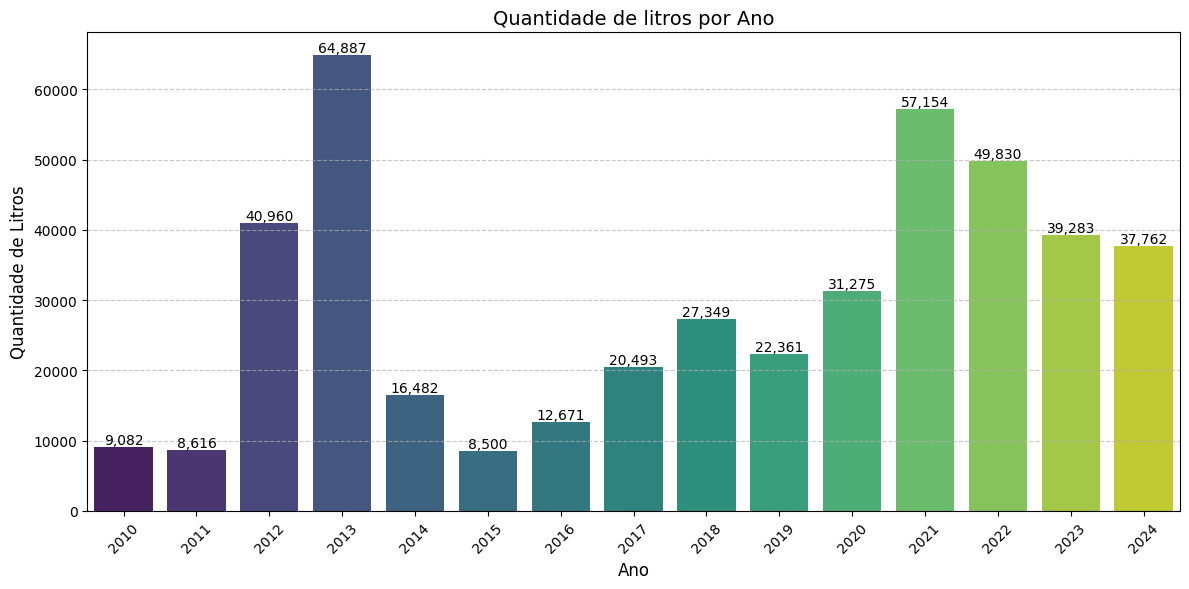

In [36]:
#Criar um gráfico de barras para exibir a quantidade de litros exportados por ano
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=exportacao_anual, x='Ano', y='Quantidade(L)', palette='viridis', ci=None)

# Adicionar rótulos de dados
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,  # posição x central da barra
        height,                         # altura da barra (posição y)
        f'{height:,.0f}',               # formatação do valor (sem casas decimais, com separador de milhar)
        ha='center',                    # alinhamento horizontal
        va='bottom',                    # alinhamento vertical
        fontsize=10,
        color='black'
    )

# Personalizar o gráfico
plt.title('Quantidade de litros por Ano', fontsize=14)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Quantidade de Litros', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


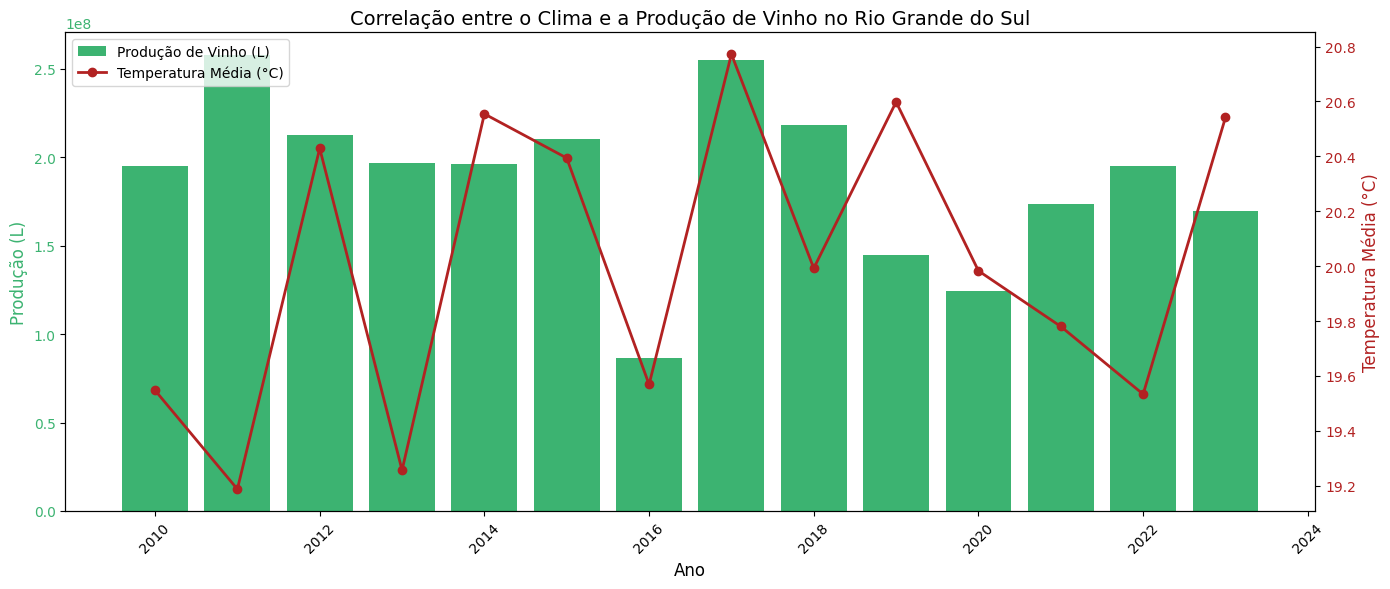

In [42]:
fig, ax1 = plt.subplots(figsize=(14, 6))

# Barras: Quantidade exportada de vinho (litros)
ax1.bar(clima_producao_exportacao['Ano'], clima_producao_exportacao['Produção (L)'], color='mediumseagreen', label='Produção de Vinho (L)')
ax1.set_xlabel('Ano', fontsize=12)
ax1.set_ylabel('Produção (L)', fontsize=12, color='mediumseagreen')
ax1.tick_params(axis='y', labelcolor='mediumseagreen')
ax1.set_title('Correlação entre o Clima e a Produção de Vinho no Rio Grande do Sul', fontsize=14)
plt.xticks(rotation=45)

# Criar segundo eixo y para a linha de temperatura
ax2 = ax1.twinx()
ax2.plot(clima_producao_exportacao['Ano'], clima_producao_exportacao['Temperatura Média (°C)'], color='firebrick', marker='o', linewidth=2, label='Temperatura Média (°C)')
ax2.set_ylabel('Temperatura Média (°C)', fontsize=12, color='firebrick')
ax2.tick_params(axis='y', labelcolor='firebrick')

# Legendas combinadas
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.tight_layout()
plt.show()

### Análise da correlação entre a Produção de Vinhos o Clima e a Exportação
A produção de uvas e vinhos no Brasil ocorre principalmente em regiões de clima temperado, subtropical e tropical. O clima exerce influência direta sobre a videira (planta da uva), afetando tanto o crescimento dos frutos quanto a qualidade final do vinho.

Segundo a Empresa Brasileira de Pesquisa Agropecuária (Embrapa), há três escalas climáticas importantes para o cultivo da uva:

- Macroclima: o clima da região como um todo.
- Mesoclima: o clima de um local específico dentro da região.
- Microclima: o clima ao redor da planta, influenciado por práticas agrícolas e ambientais.

No Sul do Brasil, a safra da uva geralmente ocorre entre os meses de setembro e abril. Durante esse período, a temperatura média ideal varia entre 17°C e 21°C, dependendo da variedade da uva cultivada.

Ao analisar o gráfico de temperatura, observamos que a temperatura média anual, nos anos analisados, permaneceu dentro da faixa ideal recomendada para o cultivo da videira.

Entretanto, a produção de vinho apresenta oscilações que não parecem estar diretamente relacionadas à temperatura. Com exceção de 2016, em que a baixa produção coincide com médias térmicas menores, nos demais anos a variação na produção pode estar mais relacionada a outros fatores, como: latitude, solo, relevo entre outros.

Essa análise é importante para compreender como o clima afeta a produção e, consequentemente, influencia a exportação dos vinhos brasileiros. Por exemplo, em anos de baixa produção, há menor disponibilidade do produto, o que pode reduzir o volume exportado ou elevar os preços, dependendo da demanda internacional. Por outro lado, safras com alta produtividade, aliadas a boas condições climáticas, favorecem melhor qualidade do vinho, o que pode valorizar o produto no mercado externo e aumentar o valor total das exportações.
Portanto, embora clima e produção sejam questões agrícolas, elas estão diretamente ligadas à estratégia de exportação.


